In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
df=pd.read_csv('/content/dataAnalystJobsIndia_7th_July_2024.csv')

In [71]:
df.head()

,Unnamed: 0,job_title,company,experience,min exp,max exp,salary,base salary,max salary,location,jobListed(days ago),postedIn,rating,reviews count,details,salary data provide by
0,0,JP Morgan Chase - Client Data Analyst (4-8 yrs),JP Morgan Chase,4-8 Yrs,4.0,8.0,NaN,NaN,NaN,Hyderabad / Secunderabad,3.0,iimjobs,4.1,5300.0,"Banking, KYC, Banking Operations",NaN
1,1,Data Analyst - Bangalore,Schneider Electric,5-10 Yrs,5.0,10.0,₹ 8 - 16L/yr,800000.0,1600000.0,"Bangalore / Bengaluru, Bangalore Rural",4.0,Naukri,4.2,3500.0,"ERP, SAP, Data Analysis",Salary Listed by Company
2,2,Senior IT ATLAS Data Analyst and Integration S...,SAP Labs India Pvt. Ltd.,7-11 Yrs,7.0,11.0,NaN,NaN,NaN,Bangalore / Bengaluru,7.0,Naukri,4.3,1500.0,"data quality, Data analysis, quality management",NaN
3,3,Consultant Data Analyst,Pfizer,2-6 Yrs,2.0,6.0,NaN,NaN,NaN,Mumbai,3.0,Naukri,4.1,1700.0,"Power Bi, Commercial Operations, Data Management",NaN
4,4,Senior Data Analyst - Retail Liabilities,IDFC FIRST Bank,5-10 Yrs,5.0,10.0,NaN,NaN,NaN,Mumbai,5.0,Naukri,4.5,2300.0,"Test strategy, Analytical, Manager Technology",NaN


**Objective**: To conduct a comprehensive analysis of data analyst job listings in
 India using Python, SQL, and Power BI. The study aims to uncover key trends in
 the job market, perform statistical and predictive analyses, and present
 actionable insights through dynamic visualizations. This case study will help
 stakeholders understand the current landscape of data analyst job opportunities
 and identify factors that influence job ratings and salaries.


**Dataset Link**:
https://drive.google.com/file/d/10kFHfiwqG5N2yaFQvZZUH5wuYmjWgBmA/
 view?usp=sharing

 Part 1: Data Cleaning and Analysis with Python
 Scenario:
 You are a data analyst at a recruitment firm. Your task is to analyze a dataset of
 data analyst job listings in India to extract valuable insights. Start by cleaning and
 exploring the data.

 Tasks:
 1. Data Cleaning and Preprocessing:
 ○ Handle missing values in the dataset appropriately.
 ○ Normalize the 'salary' column to extract numerical values for base
 and max salary if not present.
 ○ Standardize the 'experience' column to ensure a consistent format.
 2. Exploratory Data Analysis (EDA):
 ○ Perform EDA to find trends in job listings based on location,
 company, and experience level.
 ○ Visualize the distribution of job ratings and reviews count.
 3. Statistical Analysis:
 ○ Conduct hypothesis testing to determine if there's a significant
 difference in ratings between jobs posted on 'Naukri' and 'iimjobs'.
 ○ Perform a correlation analysis between job ratings and reviews
 count.

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1561 entries, 0 to 1560
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              1561 non-null   int64  
 1   job_title               1561 non-null   object 
 2   company                 1561 non-null   object 
 3   experience              1527 non-null   object 
 4   min exp                 1527 non-null   float64
 5   max exp                 1527 non-null   float64
 6   salary                  343 non-null    object 
 7   base salary             343 non-null    float64
 8   max salary              343 non-null    float64
 9   location                1528 non-null   object 
 10  jobListed(days ago)     1561 non-null   float64
 11  postedIn                1561 non-null   object 
 12  rating                  1124 non-null   float64
 13  reviews count           1124 non-null   float64
 14  details                 1528 non-null   

In [73]:
df['Salary']= pd.to_numeric(df['salary'], errors='coerce')

In [74]:
df.shape

(1561, 17)

In [75]:
df.isnull().sum()

,0
Unnamed: 0,0
job_title,0
company,0
experience,34
min exp,34
max exp,34
salary,1218
base salary,1218
max salary,1218
location,33


In [76]:
df.columns

Index(['Unnamed: 0', 'job_title', 'company', 'experience', 'min exp',
       'max exp', 'salary', 'base salary', 'max salary', 'location',
       'jobListed(days ago)', 'postedIn', 'rating', 'reviews count', 'details',
       'salary data provide by', 'Salary'],
      dtype='object')

In [77]:
#Handle missing values in the dataset appropriately.

In [78]:
df.dropna(subset=['experience'], inplace=True)

In [79]:
df.dropna(subset=['min exp'], inplace=True)

In [80]:
df.dropna(subset=['max exp'], inplace=True)

In [81]:
df.isnull().sum()

,0
Unnamed: 0,0
job_title,0
company,0
experience,0
min exp,0
max exp,0
salary,1185
base salary,1185
max salary,1185
location,0


In [82]:
df.Salary


,Salary
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1556,NaN
1557,NaN
1558,NaN
1559,NaN


In [83]:
# Alternative simpler approach using regex and pandas string methods
df[['base salary', 'max salary']] = df['salary'].str.extract(r'(\d+)\s*-\s*(\d+)').astype(float) * 100000

# Display cleaned salary columns
df[['salary', 'base salary', 'max salary']]


,salary,base salary,max salary
0,NaN,NaN,NaN
1,₹ 8 - 16L/yr,800000.0,1600000.0
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
1556,NaN,NaN,NaN
1557,NaN,NaN,NaN
1558,NaN,NaN,NaN
1559,NaN,NaN,NaN


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1527 entries, 0 to 1560
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              1527 non-null   int64  
 1   job_title               1527 non-null   object 
 2   company                 1527 non-null   object 
 3   experience              1527 non-null   object 
 4   min exp                 1527 non-null   float64
 5   max exp                 1527 non-null   float64
 6   salary                  342 non-null    object 
 7   base salary             342 non-null    float64
 8   max salary              342 non-null    float64
 9   location                1527 non-null   object 
 10  jobListed(days ago)     1527 non-null   float64
 11  postedIn                1527 non-null   object 
 12  rating                  1096 non-null   float64
 13  reviews count           1096 non-null   float64
 14  details                 1527 non-null   objec

In [85]:
df['base salary'].fillna(df['base salary'].median(),inplace=True)


<ipython-input-85-e9f4e60bc086>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['base salary'].fillna(df['base salary'].median(),inplace=True)


In [86]:
df['max salary'].fillna(df['max salary'].median(),inplace=True)

<ipython-input-86-c58cdfffe4f8>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['max salary'].fillna(df['max salary'].median(),inplace=True)


In [87]:
df['base salary']

,base salary
0,500000.0
1,800000.0
2,500000.0
3,500000.0
4,500000.0
...,...
1556,500000.0
1557,500000.0
1558,500000.0
1559,500000.0


In [88]:
df.columns

Index(['Unnamed: 0', 'job_title', 'company', 'experience', 'min exp',
       'max exp', 'salary', 'base salary', 'max salary', 'location',
       'jobListed(days ago)', 'postedIn', 'rating', 'reviews count', 'details',
       'salary data provide by', 'Salary'],
      dtype='object')

In [89]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1527 entries, 0 to 1560
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              1527 non-null   int64  
 1   job_title               1527 non-null   object 
 2   company                 1527 non-null   object 
 3   experience              1527 non-null   object 
 4   min exp                 1527 non-null   float64
 5   max exp                 1527 non-null   float64
 6   salary                  342 non-null    object 
 7   base salary             1527 non-null   float64
 8   max salary              1527 non-null   float64
 9   location                1527 non-null   object 
 10  jobListed(days ago)     1527 non-null   float64
 11  postedIn                1527 non-null   object 
 12  rating                  1096 non-null   float64
 13  reviews count           1096 non-null   float64
 14  details                 1527 non-null   objec

In [90]:
df.isnull().sum()

,0
Unnamed: 0,0
job_title,0
company,0
experience,0
min exp,0
max exp,0
salary,1185
base salary,0
max salary,0
location,0


In [91]:
df['rating'] = df['rating'].fillna(df['rating'].median())

In [92]:
df['reviews count']= df['reviews count'].fillna(df['reviews count'].median())

In [93]:
df.isnull().sum()

,0
Unnamed: 0,0
job_title,0
company,0
experience,0
min exp,0
max exp,0
salary,1185
base salary,0
max salary,0
location,0


In [94]:
df['salary data provide by']= df['salary data provide by'].fillna(df['salary data provide by'].mode()[0])

In [95]:
df.isnull().sum()


,0
Unnamed: 0,0
job_title,0
company,0
experience,0
min exp,0
max exp,0
salary,1185
base salary,0
max salary,0
location,0


In [96]:
df.drop(columns=['Salary'],inplace=True)

In [97]:
df.info()
df.drop(columns=['salary'],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1527 entries, 0 to 1560
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              1527 non-null   int64  
 1   job_title               1527 non-null   object 
 2   company                 1527 non-null   object 
 3   experience              1527 non-null   object 
 4   min exp                 1527 non-null   float64
 5   max exp                 1527 non-null   float64
 6   salary                  342 non-null    object 
 7   base salary             1527 non-null   float64
 8   max salary              1527 non-null   float64
 9   location                1527 non-null   object 
 10  jobListed(days ago)     1527 non-null   float64
 11  postedIn                1527 non-null   object 
 12  rating                  1527 non-null   float64
 13  reviews count           1527 non-null   float64
 14  details                 1527 non-null   objec

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1527 entries, 0 to 1560
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              1527 non-null   int64  
 1   job_title               1527 non-null   object 
 2   company                 1527 non-null   object 
 3   experience              1527 non-null   object 
 4   min exp                 1527 non-null   float64
 5   max exp                 1527 non-null   float64
 6   base salary             1527 non-null   float64
 7   max salary              1527 non-null   float64
 8   location                1527 non-null   object 
 9   jobListed(days ago)     1527 non-null   float64
 10  postedIn                1527 non-null   object 
 11  rating                  1527 non-null   float64
 12  reviews count           1527 non-null   float64
 13  details                 1527 non-null   object 
 14  salary data provide by  1527 non-null   objec

In [99]:
#Standardize the 'experience' column to ensure a consistent format.
df['experience'] = df['experience'].str.replace('years', '').str.strip()


In [100]:
# Exploratory Data Analysis (EDA):
#  ○ Perform EDA to find trends in job listings based on location,
#  company, and experience level.
#  ○ Visualize the distribution of job ratings and reviews count

<ipython-input-101-8cac303b523b>:14: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


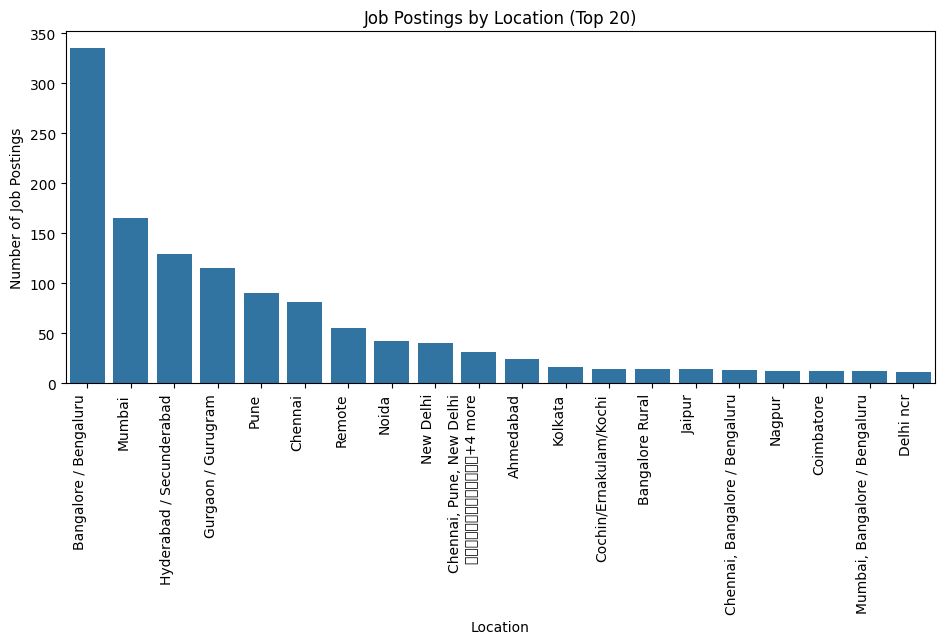

In [101]:
#Perform EDA to find trends in job listings based on location, company, and experience level.
import seaborn as sns
import matplotlib.pyplot as plt

#Job Postings per Location
location_counts = df['location'].value_counts().head(20)  # Top 20 locations #Assign the result to location_counts

plt.figure(figsize=(10, 6))
sns.barplot(x=location_counts.index, y=location_counts.values)
plt.xticks(rotation=45, ha='right')
plt.title('Job Postings by Location (Top 20)')
plt.xlabel('Location')
plt.ylabel('Number of Job Postings')
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

In [102]:
location_counts

,count
location,
Bangalore / Bengaluru,335
Mumbai,165
Hyderabad / Secunderabad,129
Gurgaon / Gurugram,115
Pune,90
Chennai,81
Remote,55
Noida,42
New Delhi,40


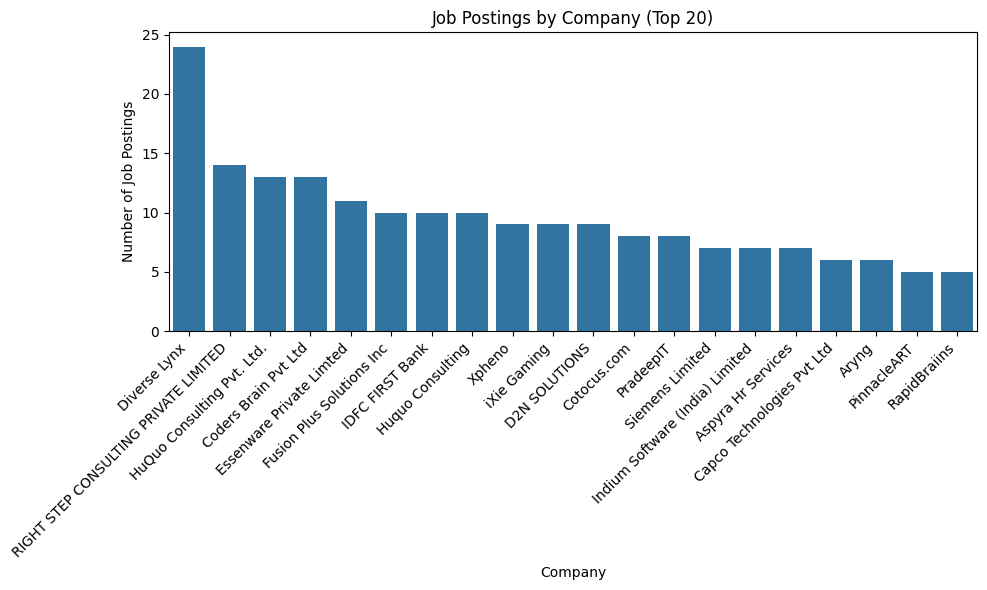

In [103]:
#Job Postings per Comapany
company_counts = df['company'].value_counts().head(20)  # Top 20 companies

plt.figure(figsize=(10, 6))
sns.barplot(x=company_counts.index, y=company_counts.values)
plt.xticks(rotation=45, ha='right')
plt.title('Job Postings by Company (Top 20)')
plt.xlabel('Company')
plt.ylabel('Number of Job Postings')
plt.tight_layout()
plt.show()

In [104]:
df.columns

Index(['Unnamed: 0', 'job_title', 'company', 'experience', 'min exp',
       'max exp', 'base salary', 'max salary', 'location',
       'jobListed(days ago)', 'postedIn', 'rating', 'reviews count', 'details',
       'salary data provide by'],
      dtype='object')

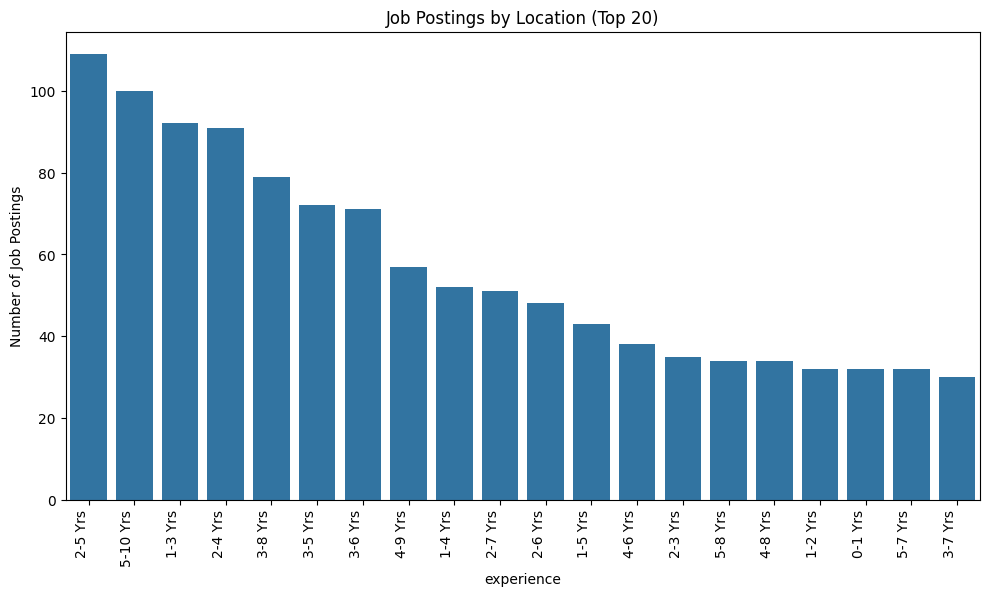

In [105]:
#Job Postings per experience
experience_counts = df['experience'].value_counts().head(20)  # Top 20 locations

plt.figure(figsize=(10, 6))
sns.barplot(x=experience_counts.index, y=experience_counts.values)
plt.xticks(rotation=45, ha='right')
plt.title('Job Postings by Location (Top 20)')
plt.xlabel('experience')
plt.ylabel('Number of Job Postings')
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

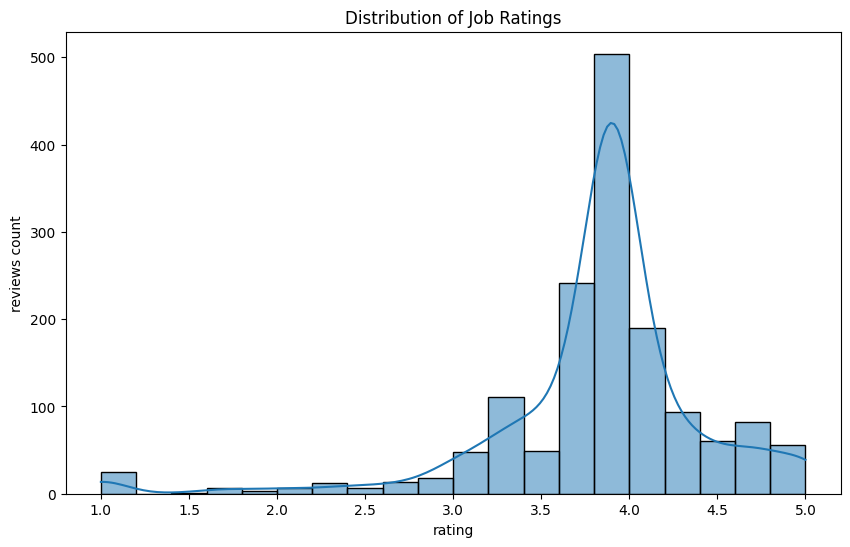

In [106]:
#Visualize the distribution of job ratings and reviews count.

plt.figure(figsize=(10, 6))
sns.histplot(df['rating'], bins=20, kde=True)
plt.title('Distribution of Job Ratings')
plt.xlabel('rating')
plt.ylabel('reviews count')
plt.show()

#3. Statistical Analysis:
  ○ Conduct hypothesis testing to determine if there's a significant
 difference in ratings between jobs posted on 'Naukri' and 'iimjobs'.

  ○ Perform a correlation analysis between job ratings and reviews
  count.

In [107]:
#Conduct hypothesis testing to determine if there's a significant difference in ratings between jobs posted on 'Naukri' and 'iimjobs'
import scipy.stats as stats

t_statistic, p_value = stats.ttest_ind(df[df['postedIn'] == 'Naukri']['rating'], df[df['postedIn'] == 'iimjobs']['rating'])

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")





T-statistic: 0.2315503543752647
P-value: 0.8169230775431687


In [108]:
alpha = 0.05

if p_value < alpha:
    print("There is a statistically significant difference in ratings between Naukri and iimjobs.")
else:
    print("There is no statistically significant difference in ratings between Naukri and iimjobs.")




There is no statistically significant difference in ratings between Naukri and iimjobs.


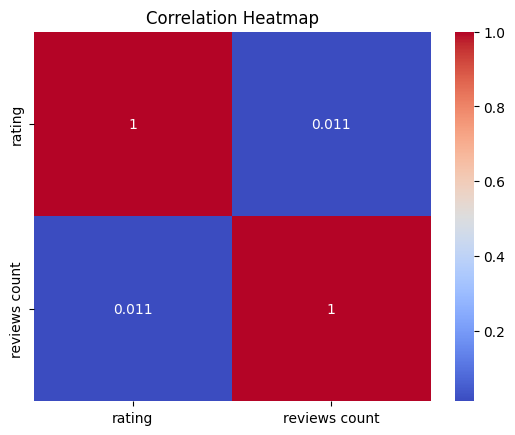

In [109]:
#Perform a correlation analysis between job ratings and reviews count
df.corr=df[['rating','reviews count']].corr()
# df.corr=df['rating'].corr(df['reviews count'])
sns.heatmap(df.corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

#Machine Learning:

 ○ Build a predictive model to estimate the 'base salary' based on other
 features in the dataset. Evaluate the model's performance using
 appropriate metrics.

 ○ Perform feature selection to identify the most important features
 influencing the base salary.

In [110]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [111]:
df.duplicated().sum()

0

In [112]:
le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1527 entries, 0 to 1560
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              1527 non-null   int64  
 1   job_title               1527 non-null   int64  
 2   company                 1527 non-null   int64  
 3   experience              1527 non-null   int64  
 4   min exp                 1527 non-null   float64
 5   max exp                 1527 non-null   float64
 6   base salary             1527 non-null   float64
 7   max salary              1527 non-null   float64
 8   location                1527 non-null   int64  
 9   jobListed(days ago)     1527 non-null   float64
 10  postedIn                1527 non-null   int64  
 11  rating                  1527 non-null   float64
 12  reviews count           1527 non-null   float64
 13  details                 1527 non-null   int64  
 14  salary data provide by  1527 non-null   int64

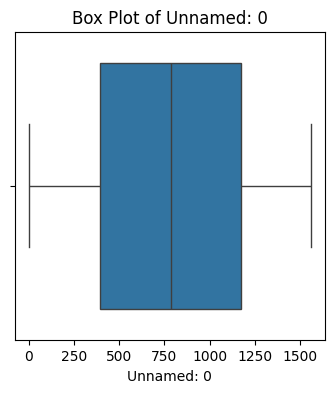

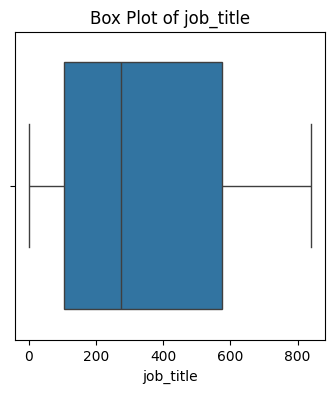

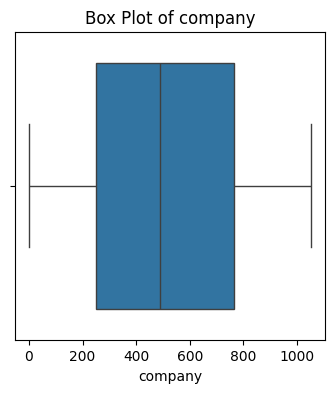

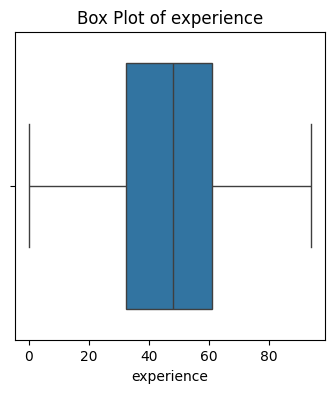

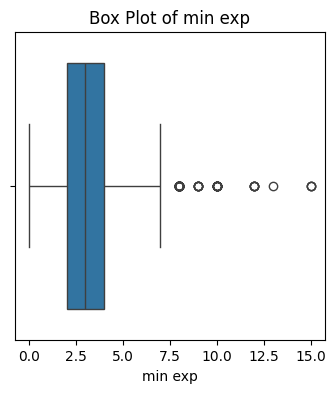

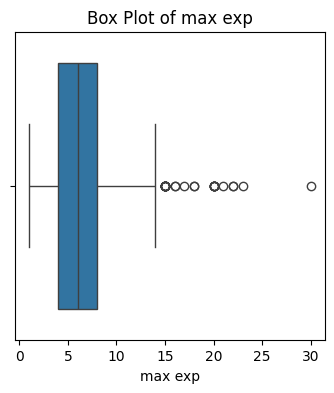

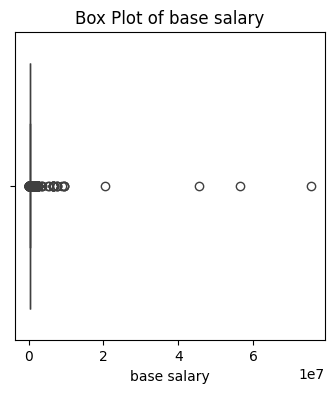

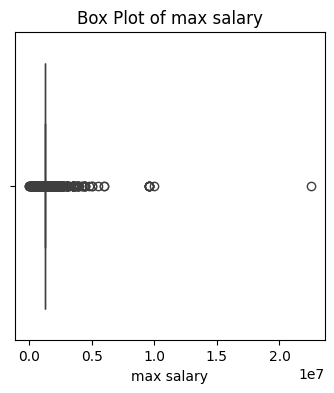

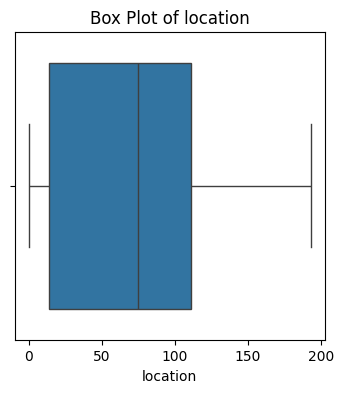

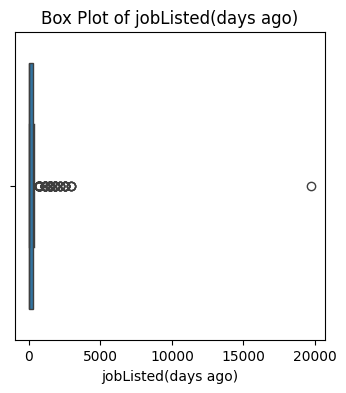

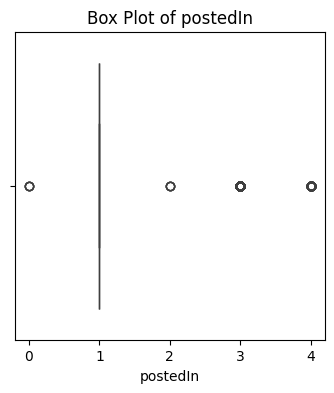

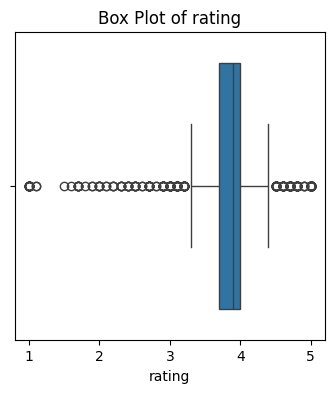

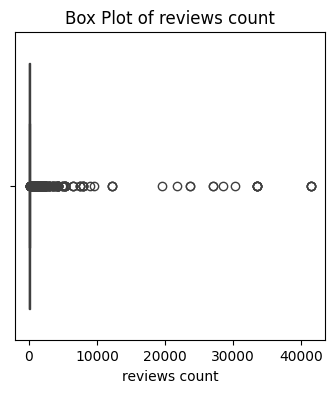

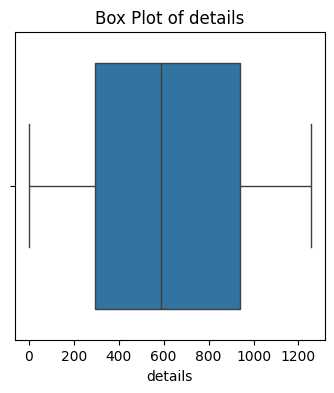

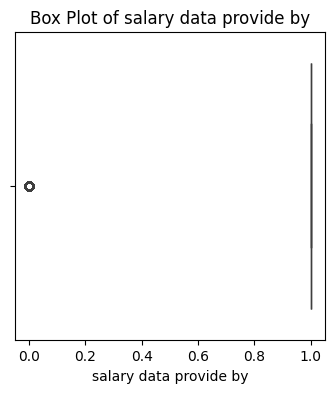

In [114]:
#checking for outliers:
for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:
        plt.figure(figsize=(4, 4))
        sns.boxplot(x=df[column])
        plt.title(f'Box Plot of {column}')
        plt.show()

In [115]:
q1=df['base salary'].quantile(0.25)
q3=df['base salary'].quantile(0.75)
iqr=q3-q1
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr
df[(df['base salary']>=lower_bound) & (df['base salary']<=upper_bound)]

,Unnamed: 0,job_title,company,experience,min exp,max exp,base salary,max salary,location,jobListed(days ago),postedIn,rating,reviews count,details,salary data provide by
0,0,490,474,60,4.0,8.0,500000.0,1300000.0,81,3.0,4,4.1,5300.0,118,1
2,2,724,757,80,7.0,11.0,500000.0,1300000.0,6,7.0,1,4.3,1500.0,1196,1
3,3,88,664,37,2.0,6.0,500000.0,1300000.0,106,3.0,1,4.1,1700.0,827,1
4,4,695,412,62,5.0,10.0,500000.0,1300000.0,106,5.0,1,4.5,2300.0,1119,1
5,5,491,474,61,4.0,9.0,500000.0,1300000.0,81,7.0,4,4.1,5300.0,720,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1556,1556,270,196,6,0.0,8.0,500000.0,1300000.0,167,150.0,1,3.9,30.5,504,1
1557,1557,16,201,61,4.0,9.0,500000.0,1300000.0,6,365.0,1,3.9,30.5,180,1
1558,1558,351,201,12,1.0,4.0,500000.0,1300000.0,6,365.0,1,3.9,30.5,35,1
1559,1559,357,201,72,6.0,10.0,500000.0,1300000.0,6,365.0,1,3.9,30.5,1061,1


In [116]:
df.columns

Index(['Unnamed: 0', 'job_title', 'company', 'experience', 'min exp',
       'max exp', 'base salary', 'max salary', 'location',
       'jobListed(days ago)', 'postedIn', 'rating', 'reviews count', 'details',
       'salary data provide by'],
      dtype='object')

In [119]:
df.isnull().sum()

,0
Unnamed: 0,0
job_title,0
company,0
experience,0
min exp,0
max exp,0
base salary,0
max salary,0
location,0
jobListed(days ago),0


In [120]:
X=df.drop(columns=['base salary','max salary','jobListed(days ago)','postedIn','rating','reviews count'])
y=df['base salary']

In [121]:
#spliting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [122]:
# Impute missing values using the mean
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # You can change the strategy if needed
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Now, try training the model again
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [123]:
df.head()

,Unnamed: 0,job_title,company,experience,min exp,max exp,base salary,max salary,location,jobListed(days ago),postedIn,rating,reviews count,details,salary data provide by
0,0,490,474,60,4.0,8.0,500000.0,1300000.0,81,3.0,4,4.1,5300.0,118,1
1,1,151,790,62,5.0,10.0,800000.0,1600000.0,7,4.0,1,4.2,3500.0,607,1
2,2,724,757,80,7.0,11.0,500000.0,1300000.0,6,7.0,1,4.3,1500.0,1196,1
3,3,88,664,37,2.0,6.0,500000.0,1300000.0,106,3.0,1,4.1,1700.0,827,1
4,4,695,412,62,5.0,10.0,500000.0,1300000.0,106,5.0,1,4.5,2300.0,1119,1


In [124]:
#r2 score & performance matrix
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 1648063235225.6833
R-squared: -0.03845235463294849


Linear regression felt to perform on the dataset, so we can train and test with random forest model.

In [128]:
#analysis using random forest
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



In [136]:
# Load dataset
df = pd.read_csv('/content/dataAnalystJobsIndia_7th_July_2024.csv')

# Select relevant features (drop columns with too many missing values or irrelevant features)
df = df[['job_title', 'company', 'min exp', 'max exp', 'location', 'base salary']]

# Drop rows where 'base salary' is missing (since it's the target variable)
df = df.dropna(subset=['base salary'])


In [137]:
# Fill missing numeric values with the median
df.fillna(df.median(numeric_only=True), inplace=True)

# Convert categorical variables into numerical representations using one-hot encoding
df = pd.get_dummies(df, columns=['job_title', 'company', 'location'], drop_first=True)


In [138]:
X = df.drop(columns=['base salary'])  # Features
y = df['base salary']  # Target variable


In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [141]:
# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Initialize RFE with the model (selecting the top 6 most important features)
rfe = RFE(estimator=rf_model, n_features_to_select=6)
X_train_selected = rfe.fit_transform(X_train, y_train)
X_test_selected = rfe.transform(X_test)

# Get selected feature names
selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features)


Selected Features: Index(['min exp', 'max exp', 'company_Aspyra Hr Services',
       'company_InnovAccer', 'company_Rocket Fast Recruiter',
       'location_Canada'],
      dtype='object')


In [142]:
# Train the model with selected features
rf_model.fit(X_train_selected, y_train)


RandomForestRegressor(random_state=42)

In [143]:
y_pred = rf_model.predict(X_test_selected)


In [144]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Absolute Error (MAE): 368925.63
Mean Squared Error (MSE): 234564834373.26
Root Mean Squared Error (RMSE): 484318.94
R² Score: 0.04
